Updated percentages being used:
GPT-4 (k=1) percentages: [3.06, 1.02, 6.12, 6.12, 1.02, 16.33, 66.33]
Total percentage: 100.00% (Count: 105)
GPT-4 (k=3) percentages: [0.0, 0.92, 5.5, 0.0, 6.42, 10.09, 77.06]
Total percentage: 99.99% (Count: 116)
Claude (k=1) percentages: [1.09, 0.0, 4.35, 1.09, 0.0, 2.17, 91.3]
Total percentage: 100.00% (Count: 100)
Claude (k=3) percentages: [0.0, 19.44, 1.39, 0.0, 1.39, 0.0, 77.78]
Total percentage: 100.00% (Count: 79)
DeepSeek (k=1) percentages: [1.19, 3.57, 1.19, 4.76, 0.0, 4.76, 84.52]
Total percentage: 99.99% (Count: 91)
DeepSeek (k=3) percentages: [0.0, 5.13, 0.0, 5.13, 0.85, 0.0, 88.89]
Total percentage: 100.00% (Count: 120)
Spinfer (k=1) percentages: [0.0, 0.0, 14.89, 27.66, 0.0, 4.26, 53.19]
Total percentage: 100.00% (Count: 114)
Spinfer (k=3) percentages: [0.0, 0.0, 8.18, 30.91, 18.18, 0.0, 42.73]
Total percentage: 100.00% (Count: 118)

Mapping of Error Types to Error Categories (Short Labels):
- Metavar Excessive Scope: Metavariable with Exc

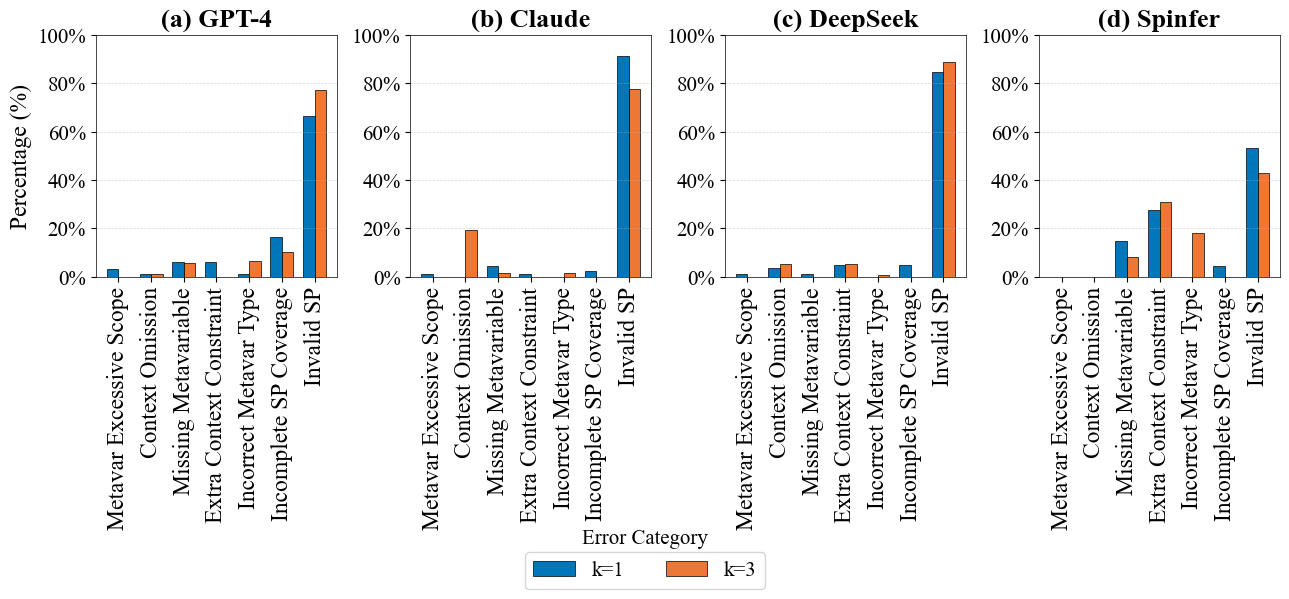

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

def create_error_distribution_chart():
    """
    Creates a chart showing the relative error distribution for different models
    and configurations (k values). The chart is formatted for academic publishing
    in a Springer journal.
    """
    # Set up matplotlib for academic publishing (Springer style)
    plt.rcParams.update({
        'font.family': 'serif',
        'font.serif': ['Times New Roman'],
        'font.size': 10,
        'axes.labelsize': 17,
        'axes.titlesize': 17,
        'xtick.labelsize': 17,
        'ytick.labelsize': 15,
        'legend.fontsize': 15,
        'figure.titlesize': 17,
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
    })

    # Set up the data
    error_types = [
        'Metavariable with Excessive Matching Scope',
        'Context Omission',
        'Missing Metavariable',
        'Extra Context Constraint',
        'Incorrect Metavariable Type',
        'Fail to Cover All Possible Control Flow Variants',
        'Invalid Semantic Patch'
    ]

    # Short labels for the x-axis with mapping for reference
    error_mapping = {
        'Metavariable with Excessive Matching Scope': 'Metavar Excessive Scope',
        'Context Omission': 'Context Omission',
        'Missing Metavariable': 'Missing Metavariable',
        'Extra Context Constraint': 'Extra Context Constraint',
        'Incorrect Metavariable Type': 'Incorrect Metavar Type',
        'Fail to Cover All Possible Control Flow Variants': 'Incomplete SP Coverage',
        'Invalid Semantic Patch': 'Invalid SP'
    }

    short_labels = [error_mapping[error] for error in error_types]

    # Updated percentage data from the table
    data = {
        'Error Type': error_types,
        'Short Label': short_labels,
        # Use the updated percentages 
        'GPT-4_k1_rel': [3.06, 1.02, 6.12, 6.12, 1.02, 16.33, 66.33],
        'GPT-4_k3_rel': [0.00, 0.92, 5.50, 0.00, 6.42, 10.09, 77.06],
        'Claude_k1_rel': [1.09, 0.00, 4.35, 1.09, 0.00, 2.17, 91.30],
        'Claude_k3_rel': [0.00, 19.44, 1.39, 0.00, 1.39, 0.00, 77.78],
        'DeepSeek_k1_rel': [1.19, 3.57, 1.19, 4.76, 0.00, 4.76, 84.52],
        'DeepSeek_k3_rel': [0.00, 5.13, 0.00, 5.13, 0.85, 0.00, 88.89],
        'Spinfer_k1_rel': [0.00, 0.00, 14.89, 27.66, 0.00, 4.26, 53.19],
        'Spinfer_k3_rel': [0.00, 0.00, 8.18, 30.91, 18.18, 0.00, 42.73]
    }
    
    # Total counts for reference
    total_counts = {
        'GPT-4_k1': 105,
        'GPT-4_k3': 116,
        'Claude_k1': 100,
        'Claude_k3': 79,
        'DeepSeek_k1': 91,
        'DeepSeek_k3': 120,
        'Spinfer_k1': 114,
        'Spinfer_k3': 118
    }

    df = pd.DataFrame(data)

    # Print the updated percentages for verification
    print("Updated percentages being used:")
    for model in ['GPT-4', 'Claude', 'DeepSeek', 'Spinfer']:
        for k in [1, 3]:
            col = f'{model}_k{k}_rel'
            count_key = f'{model}_k{k}'
            print(f"{model} (k={k}) percentages: {df[col].tolist()}")
            print(f"Total percentage: {sum(df[col]):.2f}% (Count: {total_counts[count_key]})")

    # Create a figure with 1x4 subplots
    fig, axes = plt.subplots(1, 4, figsize=(13, 5.5), constrained_layout=False)

    # Set up colors for k values - colorblind friendly
    colors = ['#0077BB', '#EE7733']  # Blue for k=1, Orange for k=3

    # Set up the bar width and positions
    bar_width = 0.35
    x = np.arange(len(short_labels))

    # Create the subplots
    models = ['GPT-4', 'Claude', 'DeepSeek', 'Spinfer']
    subplot_letters = ['(a)', '(b)', '(c)', '(d)']

    # Create the plot
    for i, model in enumerate(models):
        # Plot k=1 bars
        bars1 = axes[i].bar(x - bar_width/2, 
                    df[f'{model}_k1_rel'], 
                    bar_width, 
                    label='k=1', 
                    color=colors[0],
                    edgecolor='black',
                    linewidth=0.5)
        
        # Plot k=3 bars
        bars2 = axes[i].bar(x + bar_width/2, 
                    df[f'{model}_k3_rel'], 
                    bar_width, 
                    label='k=3', 
                    color=colors[1],
                    edgecolor='black',
                    linewidth=0.5)
        
        # Set subplot title and formatting - centered as requested
        axes[i].set_title(f'{subplot_letters[i]} {model}', fontsize=19, loc='center', fontweight="bold")
        axes[i].set_xticks(x)
        axes[i].set_xticklabels(short_labels, rotation=90, ha='center')
        
        # Set y-axis label only for the first subplot
        if i == 0:
            axes[i].set_ylabel('Percentage (%)')
        
        axes[i].yaxis.set_major_formatter(PercentFormatter())
        axes[i].grid(axis='y', linestyle='--', alpha=0.5)

        # Set y-limit to 0-100% for all subplots
        axes[i].set_ylim(0, 100)

    # Adjust layout for better spacing
    plt.tight_layout()

    # Add a common x-axis label
    fig.text(0.5, 0.002, 'Error Category', ha='center', fontsize=15)
    
    # Add a legend at the bottom of the figure
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, 
               loc='lower center', 
               bbox_to_anchor=(0.5, -0.1), 
               ncol=2)

    # Save the figure in high quality for publication
    plt.savefig('plot_error_distribution.pdf', bbox_inches='tight', dpi=600)
    # plt.savefig('error_distribution.png', bbox_inches='tight', dpi=300)

    # Print mapping table for reference
    print("\nMapping of Error Types to Error Categories (Short Labels):")
    for full, short in zip(error_types, short_labels):
        print(f"- {short}: {full}")
    
    # Return the figure for display
    return fig


fig = create_error_distribution_chart()
plt.show()